In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('\\Users\\student.IT.000\\Desktop\\Prithiga\\abalone.csv')

In [3]:
df = pd.get_dummies(df)
dummy_df = df

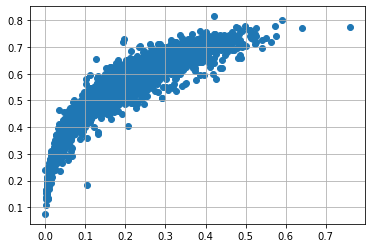

In [5]:
var = 'Viscera weight'
plt.scatter(x = df[var], y = df['Length'])
plt.grid(True)


In [7]:
df.drop(df[(df['Viscera weight'] > 0.5) &
          (df['Length'] < 20)].index, inplace = True)
df.drop(df[(df['Viscera weight']<0.5) & (
df['Length'] > 25)].index, inplace = True)

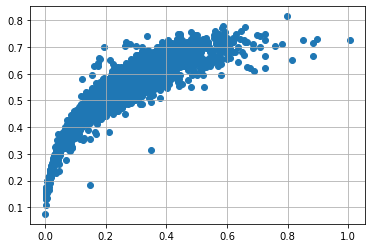

In [8]:
plot = 'Shell weight'
plt.scatter(x = df[plot], y = df['Length'])
plt.grid(True)

In [9]:
df.drop(df[(df['Shell weight'] > 0.6) &
          (df['Length'] < 25)].index, inplace = True)
df.drop(df[(df['Shell weight']<0.8) & (
df['Length'] > 25)].index, inplace = True)

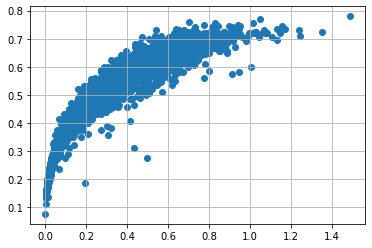

In [10]:
plot = 'Shucked weight'
plt.scatter(x = df[plot], y = df['Length'])
plt.grid(True)

In [16]:
df.drop(df[(df['Shucked weight'] >= 1) &
          (df['Rings'] < 20)].index, inplace = True)
df.drop(df[(df['Viscera weight']<1) & (
df['Rings'] > 20)].index, inplace = True)

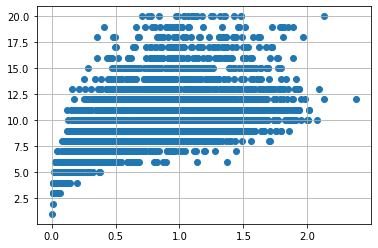

In [17]:
plot = 'Whole weight'
plt.scatter(x = df[plot], y = df['Rings'])
plt.grid(True)

In [14]:
df.drop(df[(df['Whole weight'] >= 2.5) &
          (df['Rings'] < 25)].index, inplace = True)
df.drop(df[(df['Whole weight']<2.5) & (
df['Rings'] > 25)].index, inplace = True)

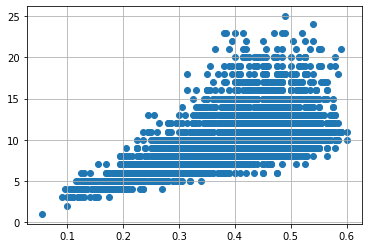

In [15]:
plot = 'Diameter'
plt.scatter(x = df[plot], y = df['Rings'])
plt.grid(True)

In [18]:
df.drop(df[(df['Diameter'] <0.1) &
          (df['Rings'] < 5)].index, inplace = True)
df.drop(df[(df['Diameter']<0.6) & (
df['Rings'] > 25)].index, inplace = True)
df.drop(df[(df['Diameter']>=0.6) & (
df['Rings'] < 25)].index, inplace = True)

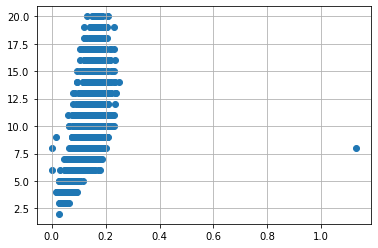

In [19]:
plot = 'Height'
plt.scatter(x = df[plot], y = df['Rings'])
plt.grid(True)

In [23]:
df.drop(df[(df['Height'] > 0.4) &
          (df['Rings'] < 15)].index, inplace = True)
df.drop(df[(df['Height']<0.4) & (
df['Rings'] > 25)].index, inplace = True)

In [ ]:
plot = 'Length'
plt.scatter(x = df[plot], y = df['Rings'])
plt.grid(True)

In [24]:
df.drop(df[(df['Length'] <0.1) &
          (df['Rings'] < 5)].index, inplace = True)
df.drop(df[(df['Length']<0.8) & (
df['Rings'] > 25)].index, inplace = True)
df.drop(df[(df['Length']>=0.8) & (
df['Rings'] < 25)].index, inplace = True)

# Feature Selection & Standardization

In [25]:
X = df.drop('Rings', axis = 1)
y = df['Rings']

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest

In [27]:
Scale = StandardScaler()
Scale.fit_transform(X)

selectkBest = SelectKBest()
X_new = selectkBest.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)

# Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [31]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
s = mean_squared_error(y_train, y_train_pred)
print('Mean Squared error of training set :%2f'%s)

p = mean_squared_error(y_test, y_test_pred)
print('Mean Squared error of testing set :%2f'%p)

Mean Squared error of training set :4.067179
Mean Squared error of testing set :4.253334


In [33]:
from sklearn.metrics import r2_score
s = r2_score(y_train, y_train_pred)
print('R2 Score of training set:%.2f'%s)

p = r2_score(y_test, y_test_pred)
print('R2 Score of testing set:%.2f'%p)

R2 Score of training set:0.53
R2 Score of testing set:0.54
